In [1]:
from datetime import datetime

In [2]:
my_year = 2020
my_month = 1
my_day=2
my_hour=13
my_min=30
my_sec=15

In [3]:
my_date = datetime(my_year,my_month,my_day)

In [4]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [5]:
my_date_time=datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [6]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [7]:
my_date_time.day

2

In [8]:
my_date_time.hour

13

In [9]:
type(my_date_time)

datetime.datetime

In [10]:
import numpy as np

In [11]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype="datetime64")

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [12]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype="datetime64[Y]")

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [13]:
np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [14]:
np.arange('1968','1978',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977'], dtype='datetime64[Y]')

In [15]:
import pandas as pd
%matplotlib inline

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Electric_Production.csv",index_col=0,parse_dates=True)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


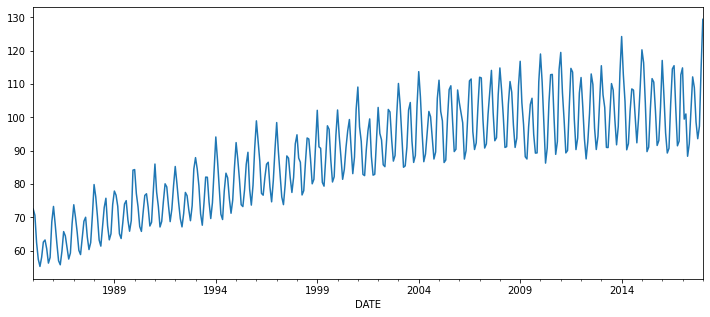

In [17]:
df['IPG2211A2N'].plot(figsize=(12,5))

In [18]:
from statsmodels.tsa.filters.hp_filter import hpfilter

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
cycleData, trendData = hpfilter(df['IPG2211A2N'],lamb=1600)

In [20]:
type(trendData)

pandas.core.series.Series

In [21]:
df['trend'] = trendData

In [22]:
df.head()

,IPG2211A2N,trend
DATE,,
1985-01-01,72.5052,63.641831
1985-02-01,70.6720,63.402312
1985-03-01,62.4502,63.168333
1985-04-01,57.4714,62.949977
1985-05-01,55.3151,62.756877


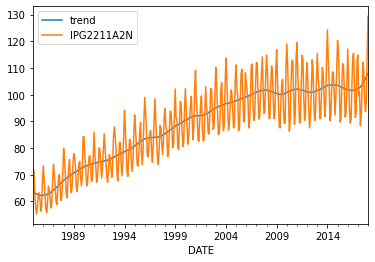

In [23]:
df[['trend','IPG2211A2N']].plot()

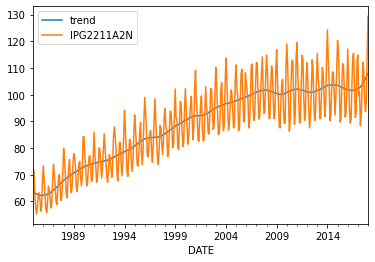

In [24]:
df[['trend','IPG2211A2N']].plot()

# ETS Error Trend Seasonality. TimeSeries decomposition with ETS

We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time.

A multiplicative model is more appropriate when we are increasing or decreasing at a non linear rate  example when we double the passengers each year

ETS decomposition with statsmodels

In [25]:
df = pd.read_csv("/content/drive/MyDrive/Electric_Production.csv",index_col=0,parse_dates=True)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [26]:
df=df.dropna()

In [27]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


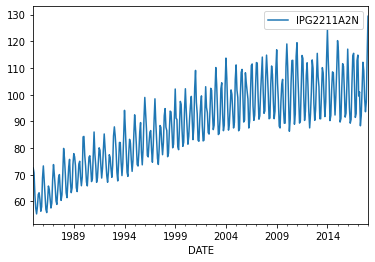

In [28]:
df.plot()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
result = seasonal_decompose(df['IPG2211A2N'],model='multiplicative')

In [31]:
result.trend

DATE
1985-01-01   NaN
1985-02-01   NaN
1985-03-01   NaN
1985-04-01   NaN
1985-05-01   NaN
              ..
2017-09-01   NaN
2017-10-01   NaN
2017-11-01   NaN
2017-12-01   NaN
2018-01-01   NaN
Name: IPG2211A2N, Length: 397, dtype: float64

In [32]:
result

In [33]:
result.seasonal

DATE
1985-01-01    1.149172
1985-02-01    1.065875
1985-03-01    0.995985
1985-04-01    0.896027
1985-05-01    0.896724
                ...   
2017-09-01    0.971682
2017-10-01    0.900691
2017-11-01    0.933050
2017-12-01    1.071668
2018-01-01    1.149172
Name: IPG2211A2N, Length: 397, dtype: float64

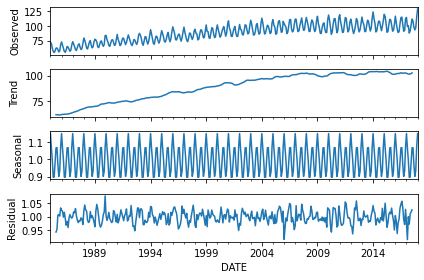

In [34]:
result.plot();

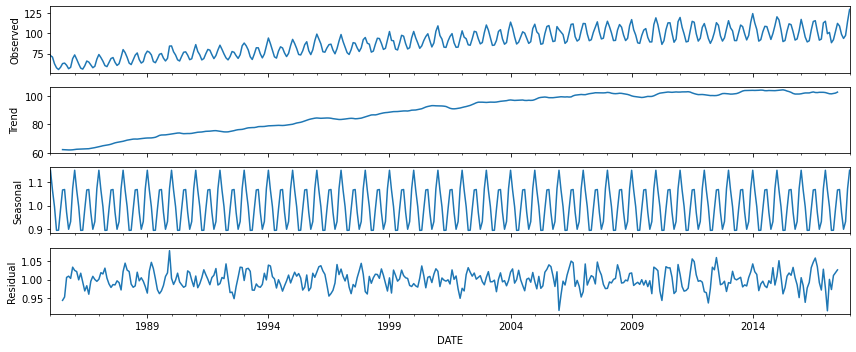

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

In [36]:
pd.date_range('2020-01-01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [37]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [38]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [39]:
pd.to_datetime(['2/1/2018','03/1/2018'])

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [40]:
pd.to_datetime(['2/1/2018','03/1/2018'], format="%d/%m/%Y")

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [41]:
data=np.random.randn(3,2)
cols=['A','B']
print(data)

[[-0.75687744  0.24800377]
 [-0.5864656  -0.28401211]
 [ 0.91454268 -0.94839308]]


In [42]:
idx=pd.date_range('2020-01-01',periods=3,freq='D')
df=pd.DataFrame(data,index=idx,columns=cols)

In [43]:
df

,A,B
2020-01-01,-0.756877,0.248004
2020-01-02,-0.586466,-0.284012
2020-01-03,0.914543,-0.948393


In [44]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [45]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [46]:
df.index.argmax()

2

In [47]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [48]:
df.index.argmin()

0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2020-01-01 to 2020-01-03
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       3 non-null      float64
dtypes: float64(2)
memory usage: 72.0 bytes


In [50]:
df

,A,B
2020-01-01,-0.756877,0.248004
2020-01-02,-0.586466,-0.284012
2020-01-03,0.914543,-0.948393


In [51]:
df = pd.read_csv("/content/drive/MyDrive/Electric_Production.csv",index_col=0,parse_dates=True)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [52]:
df.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [54]:
#daily to yearly
df.resample(rule='A')

In [55]:
df.resample(rule='A').mean()

,IPG2211A2N
DATE,
1985-12-31,62.165667
1986-12-31,62.709892
1987-12-31,65.740275
1988-12-31,69.716358
1989-12-31,71.895167
1990-12-31,73.313433
1991-12-31,75.111850
1992-12-31,75.120908
1993-12-31,77.678992


In [56]:
df.resample(rule='A').std()

,IPG2211A2N
DATE,
1985-12-31,5.746613
1986-12-31,5.317393
1987-12-31,4.858488
1988-12-31,5.990256
1989-12-31,6.053921
1990-12-31,5.513634
1991-12-31,5.568066
1992-12-31,5.884267
1993-12-31,6.583194


In [57]:
def first_day(entry):
  if len(entry):
    return entry[0]

In [58]:
df.resample(rule='A').apply(first_day)

,IPG2211A2N
DATE,
1985-12-31,72.5052
1986-12-31,73.3057
1987-12-31,73.8152
1988-12-31,79.8703
1989-12-31,77.9188
1990-12-31,84.3598
1991-12-31,86.0214
1992-12-31,85.2855
1993-12-31,87.9464


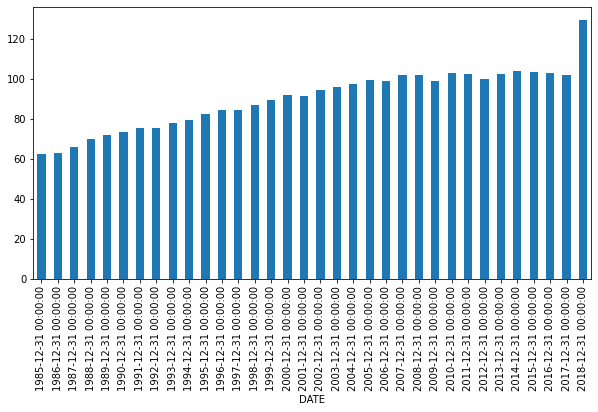

In [59]:
%matplotlib inline
df['IPG2211A2N'].resample('A').mean().plot.bar(figsize=(10,5))

In [60]:
df.shift(1)

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,72.5052
1985-03-01,70.6720
1985-04-01,62.4502
1985-05-01,57.4714
...,...
2017-09-01,108.9312
2017-10-01,98.6154
2017-11-01,93.6137


In [61]:
df.shift(-1)

,IPG2211A2N
DATE,
1985-01-01,70.6720
1985-02-01,62.4502
1985-03-01,57.4714
1985-04-01,55.3151
1985-05-01,58.0904
...,...
2017-09-01,93.6137
2017-10-01,97.3359
2017-11-01,114.7212


In [62]:
df.shift(2)

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,72.5052
1985-04-01,70.6720
1985-05-01,62.4502
...,...
2017-09-01,112.1538
2017-10-01,108.9312
2017-11-01,98.6154


In [63]:
df.shift(periods=1,freq='M')

,IPG2211A2N
DATE,
1985-01-31,72.5052
1985-02-28,70.6720
1985-03-31,62.4502
1985-04-30,57.4714
1985-05-31,55.3151
...,...
2017-09-30,98.6154
2017-10-31,93.6137
2017-11-30,97.3359


Rolling and Expanding

In [64]:
%matplotlib inline

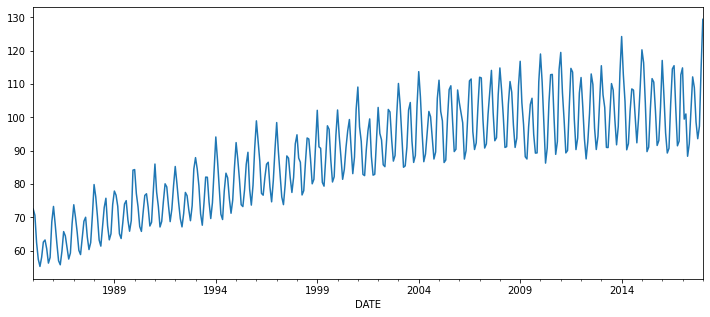

In [65]:
df['IPG2211A2N'].plot(figsize=(12,5))

In [66]:
df.rolling(window=7).mean()

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
...,...
2017-09-01,100.475243
2017-10-01,99.414400
2017-11-01,100.697671


In [67]:
df.rolling(window=7).mean().head(10)

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
1985-06-01,NaN
1985-07-01,62.732071
1985-08-01,61.409686
1985-09-01,59.968629


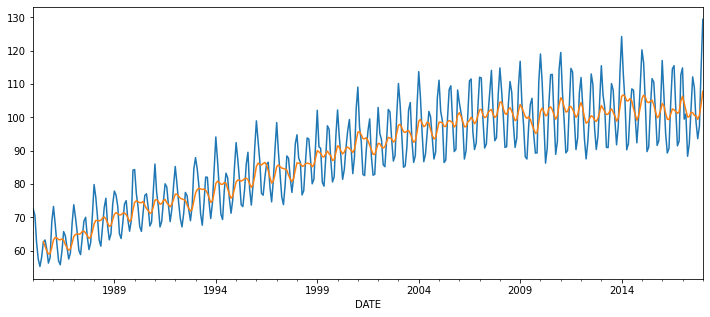

In [68]:
df['IPG2211A2N'].plot(figsize=(12,5))
df.rolling(window=7).mean()['IPG2211A2N'].plot()

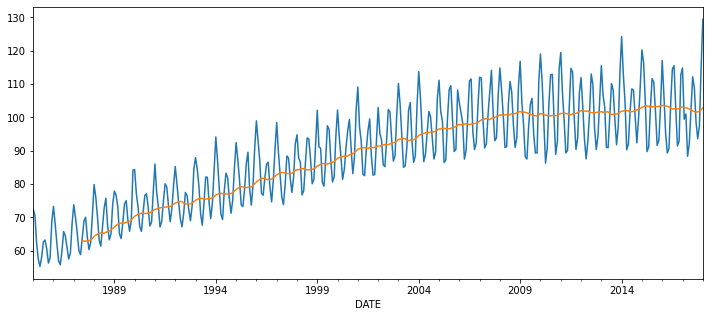

In [69]:
df['IPG2211A2N'].plot(figsize=(12,5))
df.rolling(window=30).mean()['IPG2211A2N'].plot()

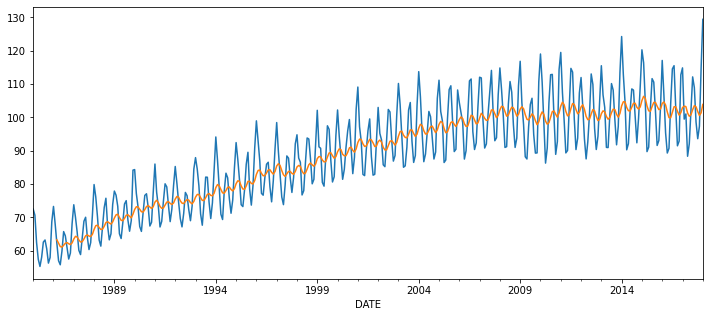

In [70]:
df['IPG2211A2N'].plot(figsize=(12,5))
df.rolling(window=15).mean()['IPG2211A2N'].plot()

In [71]:
df['IPG2211A2N 30 day mean'] = df['IPG2211A2N'].rolling(window=30).mean()

In [72]:
df['IPG2211A2N 30 day mean'].head()

DATE
1985-01-01   NaN
1985-02-01   NaN
1985-03-01   NaN
1985-04-01   NaN
1985-05-01   NaN
Name: IPG2211A2N 30 day mean, dtype: float64

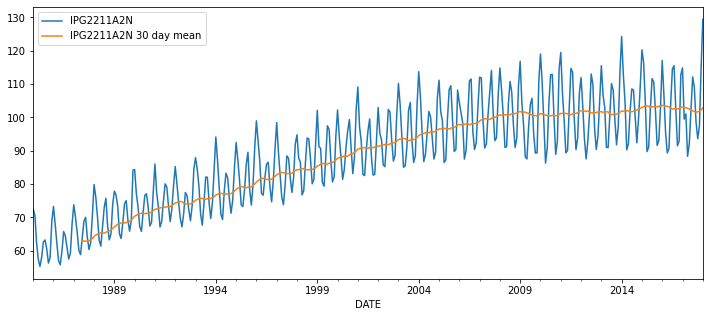

In [73]:
df[['IPG2211A2N','IPG2211A2N 30 day mean']].plot(figsize=(12,5))

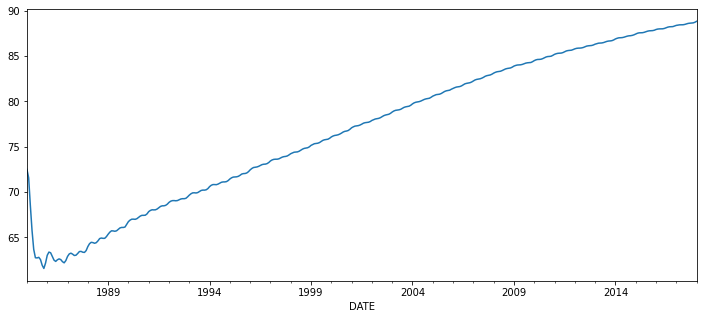

In [74]:
df['IPG2211A2N'].expanding().mean().plot(figsize=(12,5))

In [75]:
df.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

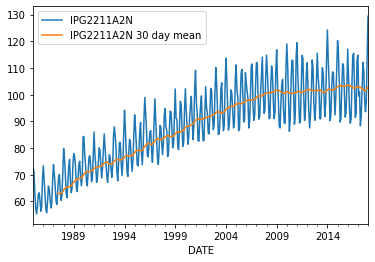

In [76]:
df.plot()

In [77]:
title='TITLE'
ylabel="Value"
xlabel="Date"

[Text(0, 0.5, 'Value'), Text(0.5, 0, 'Date')]

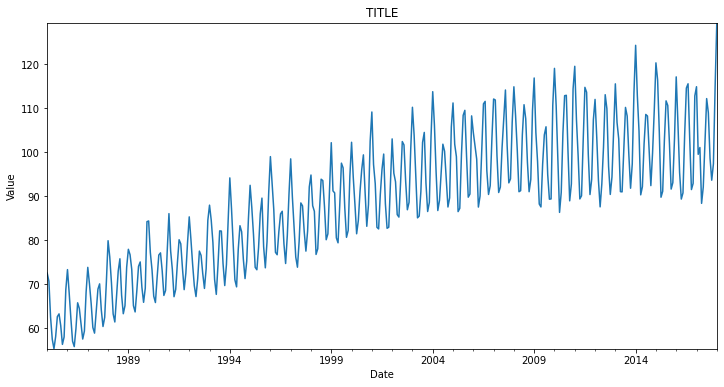

In [78]:
ax = df["IPG2211A2N"].plot(figsize=(12,6), title=title)
ax.autoscale(axis='y',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)

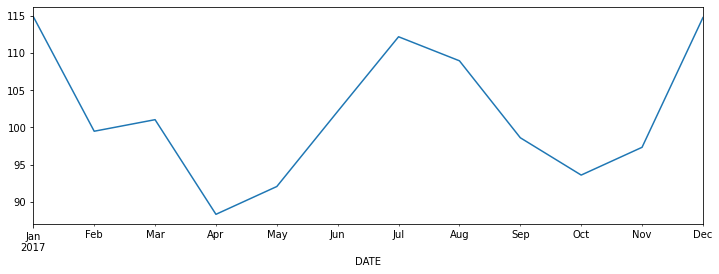

In [79]:
df['IPG2211A2N']['2017-01-01':'2017-12-01'].plot(figsize=(12,4))

In [80]:
from matplotlib import dates

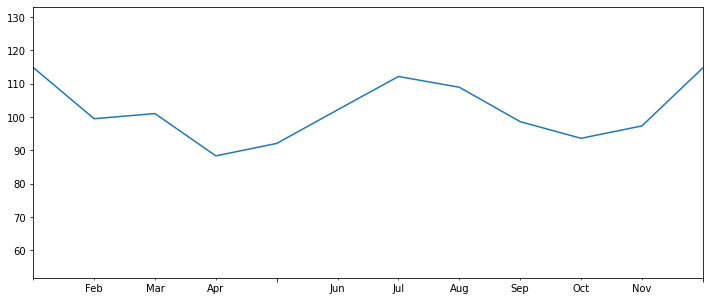

In [81]:
ax = df['IPG2211A2N'].plot(xlim=['2017-01-01','2017-12-01'], figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
# ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

In [108]:
df = pd.read_csv("/content/drive/MyDrive/tabular-playground-series-jan-2022/train.csv")
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [119]:
# subset for country = Finland, store = KaggleMart and Product = Kaggle Mug
df=df[(df.country=='Finland')&(df.store =='KaggleMart')&(df['product']=='Kaggle Mug')]
df=df.drop('row_id',axis=1)
df.head()

,date,country,store,product,num_sold
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
18,2015-01-02,Finland,KaggleMart,Kaggle Mug,318
36,2015-01-03,Finland,KaggleMart,Kaggle Mug,360
54,2015-01-04,Finland,KaggleMart,Kaggle Mug,332
72,2015-01-05,Finland,KaggleMart,Kaggle Mug,243


#### set the date column as index

In [121]:
df = df.set_index('date')
df

,country,store,product,num_sold
date,,,,
2015-01-01,Finland,KaggleMart,Kaggle Mug,329
2015-01-02,Finland,KaggleMart,Kaggle Mug,318
2015-01-03,Finland,KaggleMart,Kaggle Mug,360
2015-01-04,Finland,KaggleMart,Kaggle Mug,332
2015-01-05,Finland,KaggleMart,Kaggle Mug,243
...,...,...,...,...
2018-12-27,Finland,KaggleMart,Kaggle Mug,414
2018-12-28,Finland,KaggleMart,Kaggle Mug,499
2018-12-29,Finland,KaggleMart,Kaggle Mug,774


In [122]:
df.index

Index(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
       '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
       ...
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31'],
      dtype='object', name='date', length=1461)

#### convert to datetime index

In [123]:
df.index = pd.to_datetime(df.index)

In [124]:
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)

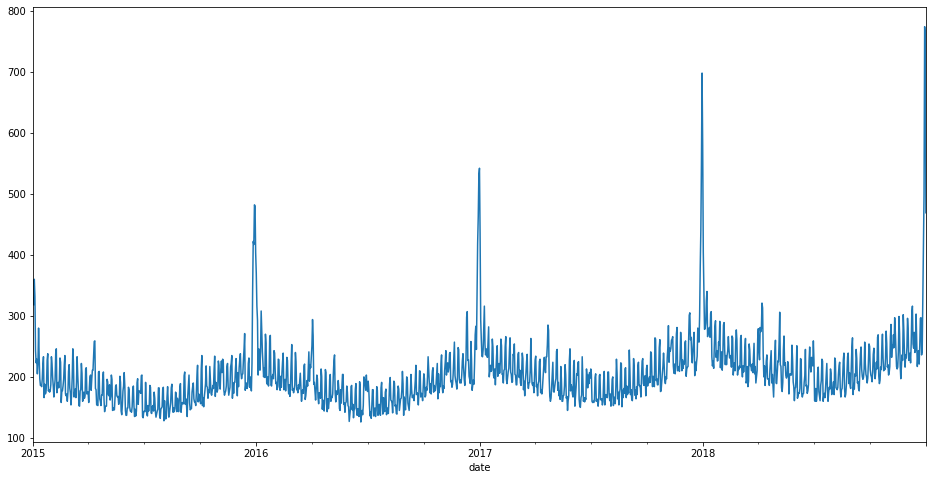

In [127]:
df['num_sold'].plot(figsize=(16,8))

% increase in numbers sold

In [130]:
round(100*(df.num_sold['2017-01-01']-df.num_sold['2018-01-01'])/df.num_sold['2015-01-01'],2)

9.42

month with the least value

In [131]:
df.num_sold['2018-01-01':].idxmin()

Timestamp('2018-07-03 00:00:00')

In [132]:
df.sort_values(by='num_sold',ascending=False).head(6)

,country,store,product,num_sold
date,,,,
2018-12-29,Finland,KaggleMart,Kaggle Mug,774
2018-12-30,Finland,KaggleMart,Kaggle Mug,757
2017-12-30,Finland,KaggleMart,Kaggle Mug,698
2017-12-31,Finland,KaggleMart,Kaggle Mug,580
2017-12-29,Finland,KaggleMart,Kaggle Mug,552
2016-12-31,Finland,KaggleMart,Kaggle Mug,542


In [133]:
df.num_sold['2018-12-31']-df.num_sold['2018-01-01']

64

Resampling month wise

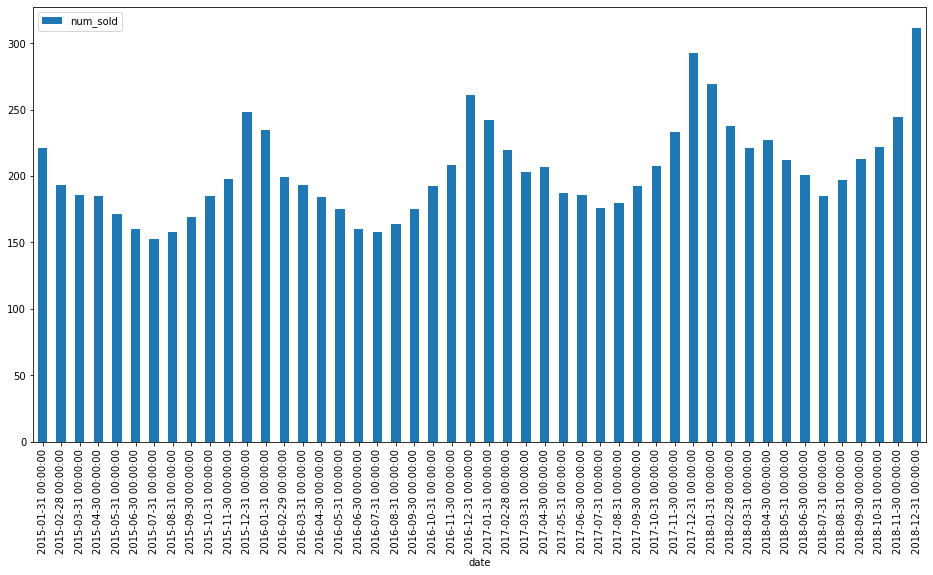

In [136]:
df.resample('M').mean().plot.bar(figsize=(16,8))

In [137]:
monthly_data=df.resample('M').mean()

In [138]:
monthly_data_shift=monthly_data.shift(1)

In [140]:
change=monthly_data-monthly_data_shift

In [141]:
change

,num_sold
date,
2015-01-31,NaN
2015-02-28,-27.657834
2015-03-31,-7.567972
2015-04-30,-1.334409
2015-05-31,-12.923656
2015-06-30,-11.476344
2015-07-31,-7.620430
2015-08-31,5.032258
2015-09-30,11.254839


In [143]:
change['num_sold'].idxmax() # maximum sold on December 2018

Timestamp('2018-12-31 00:00:00', freq='M')

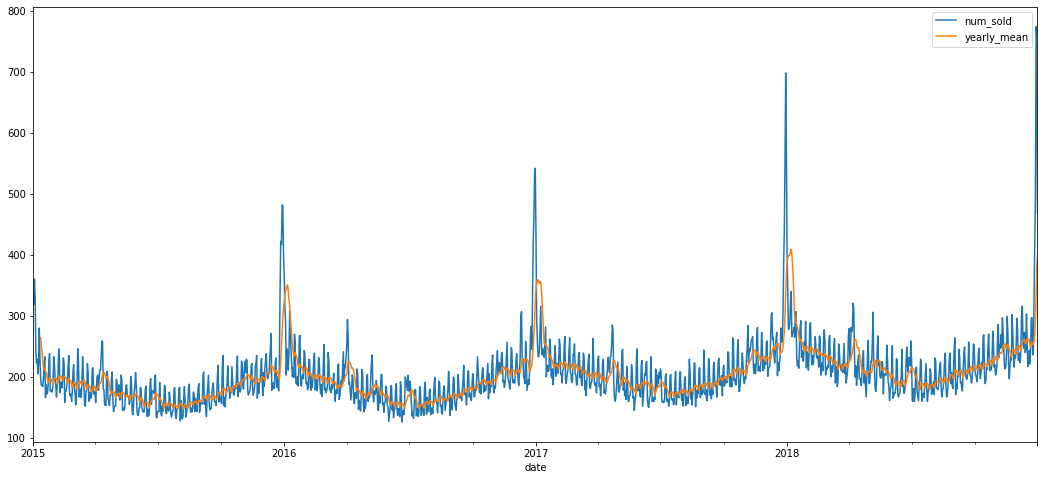

In [144]:
# yearly rolling mean
df['yearly_mean'] = df['num_sold'].rolling(window=12).mean()
df.plot(figsize=(18,8))